## ***Import and Options:***

In [ ]:
!pip install jenkspy

     |████████████████████████████████| 61kB 3.2MB/s 
  Created wheel for jenkspy: filename=jenkspy-0.2.0-cp37-cp37m-linux_x86_64.whl size=70360 sha256=63503f62921e5eeca0c36b56eb5cbcfea1f6a6e234d99197b5d1bfa16c1545ac
  Stored in directory: /root/.cache/pip/wheels/e5/ab/c7/449bc908636d689818fca058a9b530f61220b634a09597a69d
Successfully built jenkspy


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import jenkspy
import statsmodels.api as sm
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import gc
gc.collect()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0



## ***Reading Dataset:***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FDM/Preprocessed/df_droped.csv',index_col='Unnamed: 0')

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
# del df['Unnamed: 0']

In [ ]:
df.head(3)

,BMI,CIG_0,DBWT,DLMP_MM,DLMP_YY,DMAR,DOB_MM,FAGECOMB,FEDUC,FHISPX,FRACE15,FRACE31,FRACE6,ILLB_R,ILOP_R,ILP_R,IP_GON,LD_INDL,MAGER,MBSTATE_REC,MEDUC,MHISPX,MM_AICU,MRACE15,MRACE31,MTRAN,M_Ht_In,NO_INFEC,NO_MMORB,NO_RISKS,PAY,PAY_REC,PRECARE,PREVIS,PRIORDEAD,PRIORLIVE,PRIORTERM,PWgt_R,RESTATUS,RF_CESAR,RF_CESARN,SEX,WTGAIN,MRACE6,smoked,pregnancy_length,first_live_birth,first_birth,had_priordead
0,30.7,0.0,3657,4,2017,1,1,31.0,3.0,1.0,1.0,1.0,1.0,16.0,33.0,16.0,N,N,30,1.0,6.0,0.0,N,1,1,N,66.0,1.0,1.0,1.0,2.0,2.0,3.0,8.0,0.0,1.0,2.0,190.0,2,N,0.0,M,41.0,1,N,9,N,N,N
2,30.0,0.0,3470,4,2017,1,1,31.0,4.0,0.0,1.0,1.0,1.0,999.0,888.0,999.0,N,N,28,1.0,6.0,0.0,N,1,1,N,71.0,1.0,1.0,0.0,5.0,4.0,5.0,17.0,0.0,1.0,0.0,215.0,1,N,0.0,M,58.0,1,N,9,N,N,N
3,23.7,0.0,3140,5,2017,2,1,26.0,2.0,0.0,3.0,3.0,3.0,43.0,888.0,43.0,N,N,23,1.0,2.0,0.0,N,3,3,N,64.0,1.0,1.0,1.0,1.0,1.0,5.0,6.0,0.0,2.0,0.0,138.0,2,N,0.0,F,0.0,3,N,8,N,N,N


## ***EDA:***

### ***Dataset Description:***

In [ ]:
df.shape

(3611596, 49)

In [ ]:
df.dtypes

BMI                 float64
CIG_0               float64
DBWT                  int64
DLMP_MM               int64
DLMP_YY               int64
DMAR                  int64
DOB_MM                int64
FAGECOMB            float64
FEDUC               float64
FHISPX              float64
FRACE15             float64
FRACE31             float64
FRACE6              float64
ILLB_R              float64
ILOP_R              float64
ILP_R               float64
IP_GON               object
LD_INDL              object
MAGER                 int64
MBSTATE_REC         float64
MEDUC               float64
MHISPX              float64
MM_AICU              object
MRACE15               int64
MRACE31               int64
MTRAN                object
M_Ht_In             float64
NO_INFEC            float64
NO_MMORB            float64
NO_RISKS            float64
PAY                 float64
PAY_REC             float64
PRECARE             float64
PREVIS              float64
PRIORDEAD           float64
PRIORLIVE           

In [ ]:
df.describe()

,BMI,CIG_0,DBWT,DLMP_MM,DLMP_YY,DMAR,DOB_MM,FAGECOMB,FEDUC,FHISPX,FRACE15,FRACE31,FRACE6,ILLB_R,ILOP_R,ILP_R,MAGER,MBSTATE_REC,MEDUC,MHISPX,MRACE15,MRACE31,M_Ht_In,NO_INFEC,NO_MMORB,NO_RISKS,PAY,PAY_REC,PRECARE,PREVIS,PRIORDEAD,PRIORLIVE,PRIORTERM,PWgt_R,RESTATUS,RF_CESARN,WTGAIN,MRACE6,pregnancy_length
count,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06,3.611596e+06
mean,2.716572e+01,1.056830e+00,3.267055e+03,6.610457e+00,2.017249e+03,1.345183e+00,6.562842e+00,3.180562e+01,4.227723e+00,5.043396e-01,1.748268e+00,1.511048e+00,1.420713e+00,3.964691e+02,7.496989e+02,4.147218e+02,2.903234e+01,1.231020e+00,4.364280e+00,5.749065e-01,1.939064e+00,1.631683e+00,6.412142e+01,9.732775e-01,9.863163e-01,6.880518e-01,1.804514e+00,1.703932e+00,2.888754e+00,1.137455e+01,1.472605e-02,1.128884e+00,4.258541e-01,1.729576e+02,1.330279e+00,2.222529e-01,2.951218e+01,1.522075e+00,8.965370e+00
std,6.699201e+00,4.625469e+00,5.841435e+02,3.476947e+00,4.324361e-01,4.754279e-01,3.417503e+00,6.402251e+00,1.635522e+00,1.305760e+00,2.410296e+00,1.647503e+00,1.019514e+00,4.172722e+02,3.280977e+02,4.343013e+02,5.790109e+00,4.214853e-01,1.727150e+00,1.373462e+00,2.679196e+00,1.806685e+00,2.827566e+00,1.612713e-01,1.161743e-01,4.632889e-01,1.146533e+00,7.258444e-01,1.481605e+00,4.094085e+00,1.787112e-01,1.294569e+00,8.885885e-01,1.145145e+02,5.324771e-01,5.883101e-01,1.488570e+01,1.111837e+00,6.837770e-01
min,9.900000e+00,0.000000e+00,2.270000e+02,1.000000e+00,2.016000e+03,1.000000e+00,1.000000e+00,1.100000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.500000e+01,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00
25%,2.230000e+01,0.000000e+00,2.970000e+03,4.000000e+00,2.017000e+03,1.000000e+00,4.000000e+00,2.800000e+01,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.300000e+01,8.880000e+02,2.800000e+01,2.500000e+01,1.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,6.200000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300000e+02,1.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,9.000000e+00
50%,2.580000e+01,0.000000e+00,3.306000e+03,7.000000e+00,2.017000e+03,1.000000e+00,7.000000e+00,3.180541e+01,4.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.400000e+01,8.880000e+02,7.900000e+01,2.900000e+01,1.000000e+00,4.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,6.400000e+01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.136945e+01,0.000000e+00,1.000000e+00,0.000000e+00,1.500000e+02,1.000000e+00,0.000000e+00,2.950169e+01,1.000000e+00,9.000000e+00
75%,3.050000e+01,0.000000e+00,3.629000e+03,1.000000e+01,2.017000e+03,2.000000e+00,9.000000e+00,3.500000e+01,6.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.880000e+02,8.880000e+02,8.880000e+02,3.300000e+01,1.000000e+00,6.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,6.600000e+01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.300000e+01,0.000000e+00,2.000000e+00,1.000000e+00,1.810000e+02,2.000000e+00,0.000000e+00,3.800000e+01,2.000000e+00,9.000000e+00
max,2.487000e+02,9.800000e+01,8.165000e+03,1.200000e+01,2.018000e+03,2.000000e+00,1.200000e+01,9.800000e+01,8.00000

In [ ]:
 nums = df.drop(['IP_GON','LD_INDL','MM_AICU','MTRAN','RF_CESAR','SEX','smoked','first_live_birth','first_birth','had_priordead'],axis=1)
 cols = nums.columns
 nums.shape

(3611596, 39)

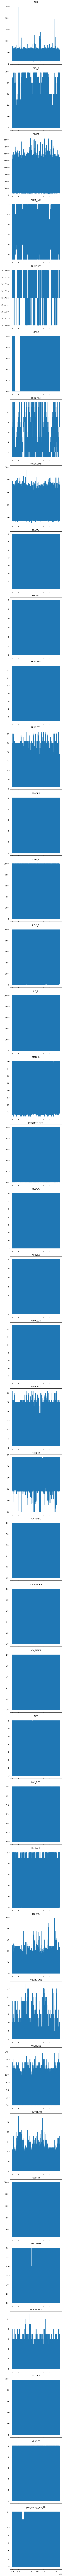

In [ ]:
fig, ax = plt.subplots(nrows=39,ncols=1, sharex=True, figsize=(5,200))
j=cols[0]

plot=0    
for j in cols: 
    ax[plot].plot(nums["%s" % j])
    ax[plot].set_title(str(j))
    plot=plot+1
    

plt.tight_layout()
plt.show()



### ***Distribution of Weight:***

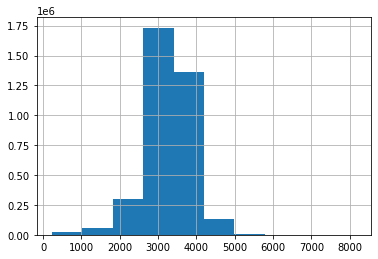

In [ ]:
df['DBWT'].hist()

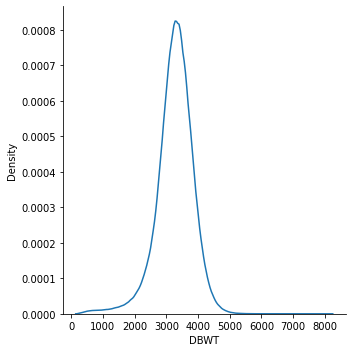

In [ ]:

sns.displot(df['DBWT'], kind="kde")

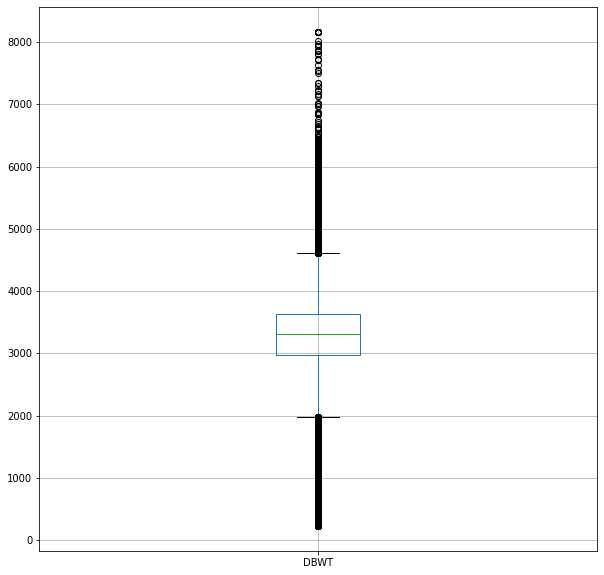

In [ ]:
df.boxplot(column=['DBWT'],figsize=(10,10))

### ***Correlation of Columns with Weight:***

In [ ]:
cor = df.corr()

In [ ]:
corr_with_target = cor['DBWT']
corr_with_target.sort_values(ascending=False)

DBWT                1.000000
pregnancy_length    0.435572
WTGAIN              0.163219
M_Ht_In             0.143537
PREVIS              0.142495
MEDUC               0.077628
NO_RISKS            0.074453
PAY_REC             0.066667
BMI                 0.061018
FEDUC               0.056577
MAGER               0.044320
PAY                 0.041294
NO_INFEC            0.037846
PRIORLIVE           0.025022
FAGECOMB            0.019670
PWgt_R              0.017979
DLMP_MM             0.009088
RF_CESARN           0.006846
PRECARE             0.003195
ILOP_R             -0.002508
FHISPX             -0.003790
DOB_MM             -0.004148
NO_MMORB           -0.005474
MHISPX             -0.010411
MBSTATE_REC        -0.011231
RESTATUS           -0.012594
PRIORDEAD          -0.019487
PRIORTERM          -0.025124
FRACE15            -0.031768
FRACE31            -0.034694
MRACE15            -0.044088
MRACE31            -0.047544
ILP_R              -0.052478
FRACE6             -0.056799
ILLB_R        

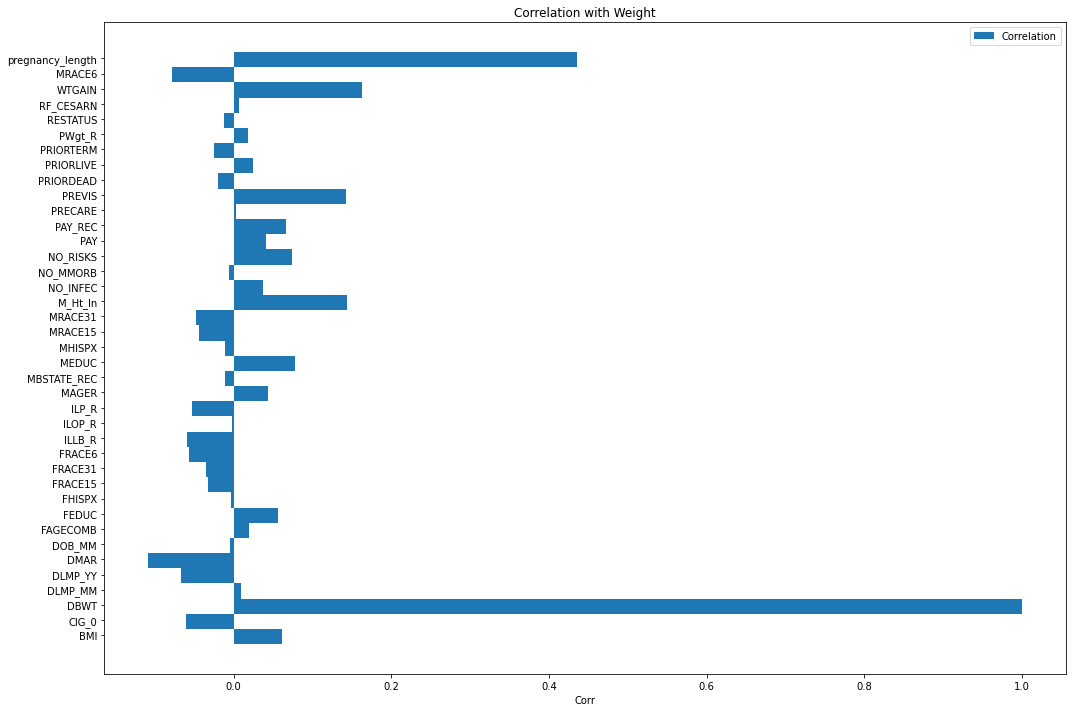

In [ ]:
labels = corr_with_target.keys()
vals = corr_with_target.values
vals
x = np.arange(len(labels))  # the label locations
width = 1  # the width of the bars


fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.barh(x - width/12, vals, width, label='Correlation')

ax.set_xlabel('Corr')
ax.set_title('Correlation with Weight')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

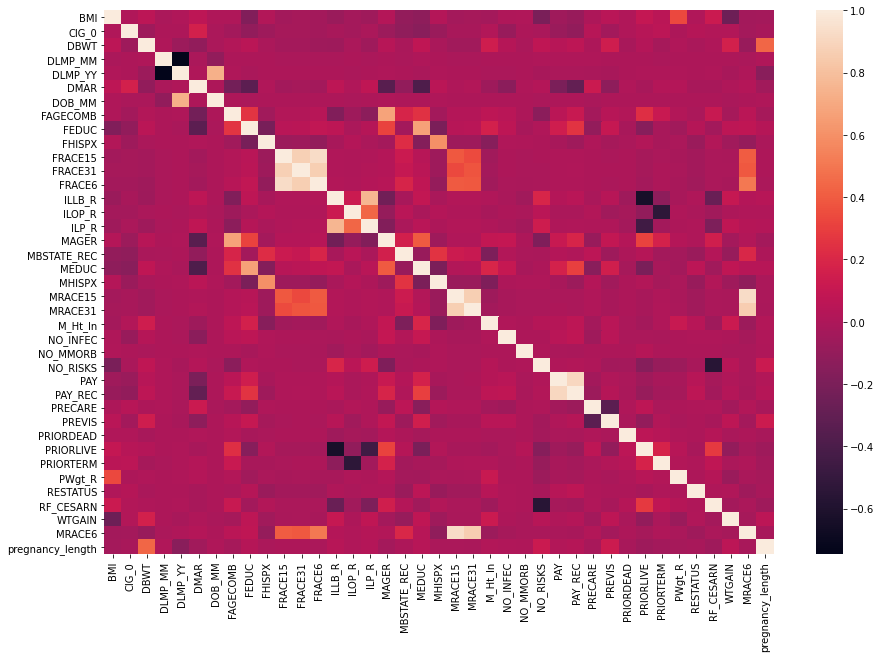

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(cor)

### ***Pair Plot:***

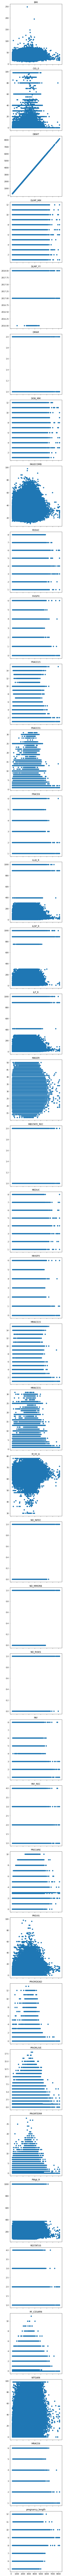

In [ ]:
fig, ax = plt.subplots(nrows=39,ncols=1, sharex=True, figsize=(5,200))
j=cols[0]

plot=0    
for j in cols: 
    ax[plot].scatter(df['DBWT'],nums["%s" % j])
    ax[plot].set_title(str(j))
    plot=plot+1
    

plt.tight_layout()
plt.show()



### ***Impact of Categorical Features On Weight:***

The categories for birthweight are consistent with the recommendations 
in the International Statistical Classification of Diseases, Ninth Revision (ICD–9) and the International Statistical Classification of Diseases, Tenth Revision (ICD–10) 

In [ ]:
w_breaks = [227,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,8165]

In [ ]:
w_labels = ['LessThan500','500-1000','1000-1500','1500-2000','2000-2500',
          '2500-3000','3000-3500','3500-4000','4000-4500','4500-5000',
          'GreaterThan5000']

#### ***SEX:***

In [ ]:
df_sex_weight = df[['SEX','DBWT']]

In [ ]:
df_sex_weight['DBWT_categories'] = pd.cut(df['DBWT'], bins=w_breaks, labels=w_labels)

In [ ]:
df_sex_weight.drop(columns=['DBWT'],axis=1,inplace=True)

In [ ]:
df_sex_weight.head(2)

,SEX,DBWT_categories
0,M,3500-4000
1,M,3000-3500


In [ ]:
contTable_weight_sex = pd.crosstab(df_sex_weight['DBWT_categories'],df_sex_weight['SEX'])

In [ ]:
contTable_weight_sex

SEX,F,M
DBWT_categories,,
LessThan500,2010,2000
500-1000,8485,8579
1000-1500,12751,12806
1500-2000,29700,27634
2000-2500,103038,86296
2500-3000,379625,300901
3000-3500,717204,689423
3500-4000,413597,540099
4000-4500,87670,152666


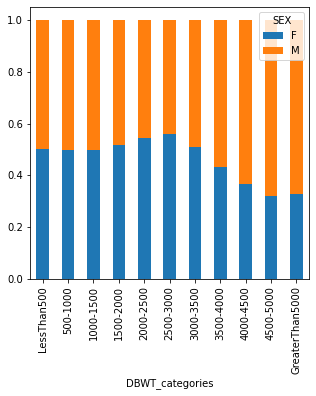

In [ ]:
contTable_weight_sex_norm = contTable_weight_sex.div(contTable_weight_sex.sum(1),axis=0)
contTable_weight_sex_norm.plot(kind='bar',stacked=True,figsize=(5, 5))

#### ***SMOKE:***

In [ ]:
df_smoke_weight = df[['smoked','DBWT']]

In [ ]:
df_smoke_weight['DBWT_categories'] = pd.cut(df['DBWT'], bins=w_breaks, labels=w_labels)

In [ ]:
df_smoke_weight.drop(columns=['DBWT'],axis=1,inplace=True)

In [ ]:
contTable_weight_smoke = pd.crosstab(df_smoke_weight['DBWT_categories'],df_smoke_weight['smoked'])

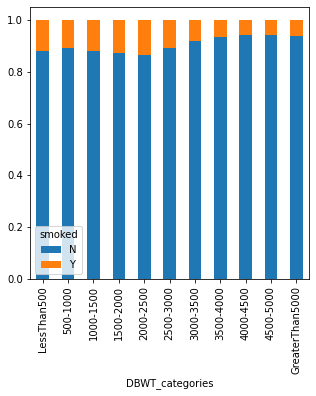

In [ ]:
contTable_weight_smoke = contTable_weight_smoke.div(contTable_weight_smoke.sum(1),axis=0)
contTable_weight_smoke.plot(kind='bar',stacked=True,figsize=(5, 5))

#### ***Perior Dead:***

In [ ]:
df_had_priordead_weight = df[['had_priordead','DBWT']]

In [ ]:
df_had_priordead_weight['DBWT_categories'] = pd.cut(df['DBWT'], bins=w_breaks, labels=w_labels)

In [ ]:
df_had_priordead_weight.drop(columns=['DBWT'],axis=1,inplace=True)

In [ ]:
contTable_weight_perior_dead = pd.crosstab(df_had_priordead_weight['DBWT_categories'],df_had_priordead_weight['had_priordead'])

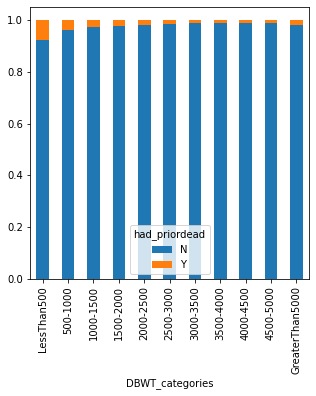

In [ ]:
contTable_weight_perior_dead = contTable_weight_perior_dead.div(contTable_weight_perior_dead.sum(1),axis=0)
contTable_weight_perior_dead.plot(kind='bar',stacked=True,figsize=(5, 5))

#### ***First Birth:***

In [ ]:
df_first_birth_weight = df[['first_birth','DBWT']]

In [ ]:
df_first_birth_weight['DBWT_categories'] = pd.cut(df['DBWT'], bins=w_breaks, labels=w_labels)

In [ ]:
df_first_birth_weight.drop(columns=['DBWT'],axis=1,inplace=True)

In [ ]:
contTable_weight_first_birth = pd.crosstab(df_first_birth_weight['DBWT_categories'],df_first_birth_weight['first_birth'])

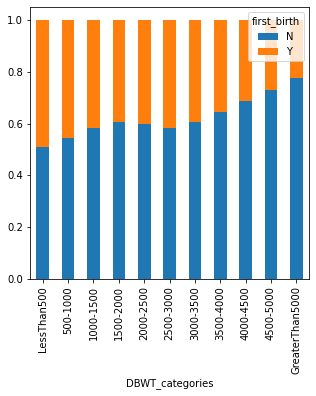

In [ ]:
contTable_weight_first_birth = contTable_weight_first_birth.div(contTable_weight_first_birth.sum(1),axis=0)
contTable_weight_first_birth.plot(kind='bar',stacked=True,figsize=(5, 5))

#### ***Previous Cesarian:***

In [ ]:
df_RF_CESAR_weight = df[['RF_CESAR','DBWT']]

In [ ]:
df_RF_CESAR_weight['DBWT_categories'] = pd.cut(df['DBWT'], bins=w_breaks, labels=w_labels)

In [ ]:
df_RF_CESAR_weight.drop(columns=['DBWT'],axis=1,inplace=True)

In [ ]:
contTable_weight_RF_CESAR = pd.crosstab(df_RF_CESAR_weight['DBWT_categories'],df_RF_CESAR_weight['RF_CESAR'])

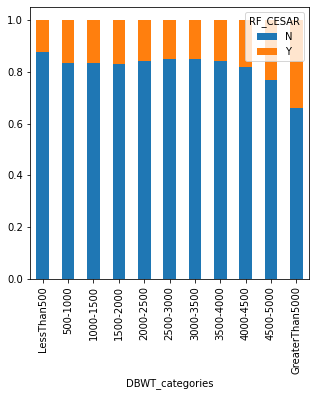

In [ ]:
contTable_weight_RF_CESAR = contTable_weight_RF_CESAR.div(contTable_weight_RF_CESAR.sum(1),axis=0)
contTable_weight_RF_CESAR.plot(kind='bar',stacked=True,figsize=(5, 5))

### ***OLS Analysis:***

In [ ]:
rdf = df
rdf.shape

(3611596, 49)

In [ ]:
rdf.head(2)

,BMI,CIG_0,DBWT,DLMP_MM,DLMP_YY,DMAR,DOB_MM,FAGECOMB,FEDUC,FHISPX,FRACE15,FRACE31,FRACE6,ILLB_R,ILOP_R,ILP_R,IP_GON,LD_INDL,MAGER,MBSTATE_REC,MEDUC,MHISPX,MM_AICU,MRACE15,MRACE31,MTRAN,M_Ht_In,NO_INFEC,NO_MMORB,NO_RISKS,PAY,PAY_REC,PRECARE,PREVIS,PRIORDEAD,PRIORLIVE,PRIORTERM,PWgt_R,RESTATUS,RF_CESAR,RF_CESARN,SEX,WTGAIN,MRACE6,smoked,pregnancy_length,first_live_birth,first_birth,had_priordead
0,30.7,0.0,3657,4,2017,1,1,31.0,3.0,1.0,1.0,1.0,1.0,16.0,33.0,16.0,N,N,30,1.0,6.0,0.0,N,1,1,N,66.0,1.0,1.0,1.0,2.0,2.0,3.0,8.0,0.0,1.0,2.0,190.0,2,N,0.0,M,41.0,1,N,9,N,N,N
2,30.0,0.0,3470,4,2017,1,1,31.0,4.0,0.0,1.0,1.0,1.0,999.0,888.0,999.0,N,N,28,1.0,6.0,0.0,N,1,1,N,71.0,1.0,1.0,0.0,5.0,4.0,5.0,17.0,0.0,1.0,0.0,215.0,1,N,0.0,M,58.0,1,N,9,N,N,N


In [ ]:
categorical_columns = [
                       'FEDUC',
                       'FHISPX',
                       'FRACE6',
                       'MEDUC',
                       'MHISPX',
                       'NO_INFEC',
                       'NO_MMORB',
                       'NO_RISKS',
                       'PAY',
                       'PAY_REC',
                       'FRACE15',
                       'FRACE31',
                       'DMAR',
                       'IP_GON',
                       'LD_INDL',
                       'MM_AICU',
                       'MTRAN',
                       'RF_CESAR',
                       'MBSTATE_REC',
                       'smoked',
                       'first_live_birth',
                       'first_birth',
                       'had_priordead',
                       'MRACE31',
                       'MRACE15',
                       'RESTATUS',
                       'SEX',
                       'MRACE6'


]

In [ ]:
numerical_columns = [
                     'BMI',
                     'CIG_0',
                     'FAGECOMB',
                     'M_Ht_In',
                     'PRECARE',
                     'PREVIS',
                     'PRIORDEAD',
                     'PRIORLIVE',
                     'PRIORTERM',
                     'RF_CESARN',
                     'WTGAIN',
                     'ILLB_R',
                     'ILOP_R',
                     'ILP_R',
                     'PWgt_R',
                     'DLMP_MM', ## ???
                     'DLMP_YY',
                     'DOB_MM', ## ???
                     'MAGER',
                     'pregnancy_length'
                     
]

In [ ]:
for c in numerical_columns:
  rdf[c] = zscore(rdf[c])

In [ ]:
rdf = pd.get_dummies(rdf, columns=categorical_columns)

In [ ]:
y = rdf[['DBWT']]

In [ ]:
X = rdf.drop(['DBWT'],axis=1)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.8, random_state=7)

In [ ]:
rsquares=[]
mcols = X.columns 

In [ ]:
for c in mcols:
  model = sm.OLS(y, X["%s" % c])
  results = model.fit()
  rsquares.append(results.rsquared)

In [ ]:
R_Squares = pd.Series(rsquares,index=mcols)

In [ ]:
R_Squares

BMI         1.153384e-04
CIG_0       1.139539e-04
DLMP_MM     2.558395e-06
DLMP_YY     1.358829e-04
DOB_MM      5.329401e-07
                ...     
MRACE6_2    1.351110e-01
MRACE6_3    9.308215e-03
MRACE6_4    6.188233e-02
MRACE6_5    3.024630e-03
MRACE6_6    2.501509e-02
Length: 199, dtype: float64

In [ ]:
R_Squares_ordered = R_Squares.sort_values(ascending=False)
R_Squares_ordered

MM_AICU_N          9.679731e-01
MTRAN_N            9.671371e-01
IP_GON_N           9.664766e-01
had_priordead_N    9.577505e-01
NO_MMORB_1.0       9.555414e-01
                       ...     
RF_CESARN          1.451896e-06
FRACE31_27.0       7.867696e-07
DOB_MM             5.329401e-07
PRECARE            3.162331e-07
ILOP_R             1.947837e-07
Length: 199, dtype: float64

In [ ]:
print(np.cumsum(R_Squares_ordered))

MM_AICU_N           0.967973
MTRAN_N             1.935110
IP_GON_N            2.901587
had_priordead_N     3.859337
NO_MMORB_1.0        4.814879
                     ...    
RF_CESARN          27.147082
FRACE31_27.0       27.147083
DOB_MM             27.147084
PRECARE            27.147084
ILOP_R             27.147084
Length: 199, dtype: float64


In [ ]:
sm.OLS(Y_train, X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   DBWT   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     2068.
Date:                Sat, 12 Jun 2021   Prob (F-statistic):               0.00
Time:                        06:31:43   Log-Likelihood:            -5.4985e+06
No. Observations:              722319   AIC:                         1.100e+07
Df Residuals:                  722170   BIC:                         1.100e+07
Df Model:                         148                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
BMI                   83.6810      0.672    124.443      0.000      82.363      84.999
CIG_0                -12.7663      0.891    -14.332      0.000     -14.512     -11.020
DLMP_MM              269.7555     27.317      9.875      0.000     216.216     323.295
DLMP_YY              403.4288     40.761      9.897      0.000     323.539     483.319
DOB_MM              -267.5764     26.851     -9.965      0.000    -320.203    -214.950
FAGECOMB              -4.6693      0.805     -5.803      0.000      -6.246      -3.092
ILLB_R                -4.7611      1.849     -2.575      0.010      -8.385      -1.137
ILOP_R                -4.5385      0.948     -4.790      0.000      -6.396      -2.681
ILP_R                  6.1445      1.390      4.419      0.000       3.419       8.870
MAGER                -11.5946      0.933    -12.424      0.000     -13.424      -9.765
M_Ht_In               70.6518      0.624    113.156      0.000      69.428      71.876
PRECARE               32.2212      0.620     51.977      0.000      31.006      33.436
PREVIS                43.8064      0.634     69.098      0.000      42.564      45.049
PRIORDEAD              1.0799      0.839      1.287      0.198      -0.565       2.725
PRIORLIVE             16.2618      0.888     18.307      0.000      14.521      18.003
PRIORTERM            -10.8095      0.904    -11.959      0.000     -12.581      -9.038
PWgt_R                -4.6971      0.625     -7.513      0.000      -5.922      -3.472
RF_CESARN             -8.6611      1.242     -6.974      0.000     -11.095      -6.227
WTGAIN                92.2567      0.610    151.169      0.000      91.061      93.453
pregnancy_length     281.7233      5.421     51.972      0.000     271.099     292.348
FEDUC_1.0             47.4098      3.470     13.664      0.000      40.609      54.210
FEDUC_2.0             25.5521      2.204     11.594      0.000      21.233      29.872
FEDUC_3.0             29.1098      1.454     20.021      0.000      26.260      31.959
FEDUC_4.0             19.5680      1.409     13.892      0.000      16.807      22.329
FEDUC_5.0             43.2750      2.208     19.596      0.000      38.947      47.603
FEDUC_6.0             47.1458      1.625     29.010      0.000      43.961      50.331
FEDUC_7.0             49.3691      2.302     21.445      0.000      44.857      53.881
FEDUC_8.0             31.3366      3.301      9.493      0.000      24.867      37.807
FHISPX_0.0            59.7907      2.391     25.011      0.000      55.105      64.476
FHISPX_1.0            31.7508      2.855     11.121      0.000      26.155      37.346
FHISPX_2.0            38.6467      4.599      8.404      0.000      29.634      47.660
FHISPX_3.0            58.3801      7.937      7.356      0.000      42.825      73.935
FHISPX_4.0            29.4427      3.7

### ***VIF***

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

In [ ]:

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(len(X_train.columns))]
  


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
